In [34]:
import math
from datetime import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
%%time
# Documents/me/battery/charger 1 30 ah.xlsx
df = pd.read_excel('./charger 1 30 ah.xlsx', "TimeSeriesData")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TIME    22699 non-null  datetime64[ns]
 1   CH1     22699 non-null  float64       
 2   CH2     22694 non-null  float64       
 3   CH3     22694 non-null  object        
 4   CH4     22693 non-null  float64       
 5   CH5     22693 non-null  float64       
 6   CH6     22693 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.2+ MB
CPU times: total: 3.84 s
Wall time: 6.73 s


,TIME,CH1,CH2,CH3,CH4,CH5,CH6
0,2022-12-31 13:04:17.043,688.58,2500.0,4.99,54.67,7.6,50748
1,2022-12-31 13:04:17.714,677.94,2500.0,4.99,54.68,7.6,50718
2,2022-12-31 13:04:18.965,681.81,2500.0,4.92,54.66,7.6,50658
3,2022-12-31 13:04:20.246,680.20,2500.0,4.95,54.66,7.6,50598
4,2022-12-31 13:04:20.965,680.20,2500.0,4.93,54.67,7.6,50568
...,...,...,...,...,...,...,...
22694,2022-12-31 19:23:17.072,867.11,2500.0,0.02,64.16,7.6,1
22695,2022-12-31 19:23:18.338,868.40,2500.0,0.02,64.16,7.6,1
22696,2022-12-31 19:23:19.306,868.40,2500.0,0.02,64.15,7.6,1
22697,2022-12-31 19:23:20.291,867.44,2500.0,0.02,64.15,7.6,1


In [35]:
df.columns = ["Time", "CH1", "CH2", "Current", "Voltage", "CH5", "CH6"]
req_cols = ["Time", "Current", "Voltage",]
df_selected = df[req_cols]

In [36]:
df_selected["Time_Lag1"] = df_selected["Time"].shift(1)
df_selected["Time_Snap"] = (df_selected["Time"] - df_selected["Time_Lag1"]).dt.total_seconds()
df_selected["Time_Sec"] = df_selected["Time_Snap"].fillna(0).cumsum(axis=0)

df_selected

,Time,Current,Voltage,Time_Lag1,Time_Snap,Time_Sec
0,2022-12-31 13:04:17.043,4.99,54.67,NaT,NaN,0.000
1,2022-12-31 13:04:17.714,4.99,54.68,2022-12-31 13:04:17.043,0.671,0.671
2,2022-12-31 13:04:18.965,4.92,54.66,2022-12-31 13:04:17.714,1.251,1.922
3,2022-12-31 13:04:20.246,4.95,54.66,2022-12-31 13:04:18.965,1.281,3.203
4,2022-12-31 13:04:20.965,4.93,54.67,2022-12-31 13:04:20.246,0.719,3.922
...,...,...,...,...,...,...
22694,2022-12-31 19:23:17.072,0.02,64.16,2022-12-31 19:23:16.103,0.969,22740.029
22695,2022-12-31 19:23:18.338,0.02,64.16,2022-12-31 19:23:17.072,1.266,22741.295
22696,2022-12-31 19:23:19.306,0.02,64.15,2022-12-31 19:23:18.338,0.968,22742.263
22697,2022-12-31 19:23:20.291,0.02,64.15,2022-12-31 19:23:19.306,0.985,22743.248


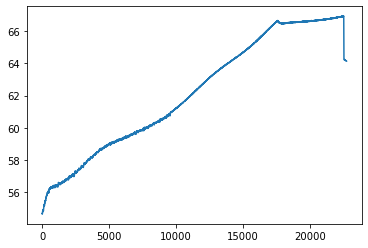

In [10]:
plt.plot(df_selected["Time_Sec"], df_selected["Voltage"])
plt.show()

In [11]:
max(df_selected.Voltage)

66.94

In [22]:
# df_selected.where(df_selected.Voltage == max(df_selected.Voltage))["Time_Sec"]
df_selected_filtered = df_selected.query("Time_Sec <= 22536")
df_selected_filtered.info()
df_selected_filtered

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22490 entries, 0 to 22489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       22490 non-null  datetime64[ns]
 1   Current    22485 non-null  object        
 2   Voltage    22484 non-null  float64       
 3   Time_Lag1  22489 non-null  datetime64[ns]
 4   Time_Snap  22489 non-null  float64       
 5   Time_Sec   22490 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 1.2+ MB


,Time,Current,Voltage,Time_Lag1,Time_Snap,Time_Sec
0,2022-12-31 13:04:17.043,4.99,54.67,NaT,NaN,0.000
1,2022-12-31 13:04:17.714,4.99,54.68,2022-12-31 13:04:17.043,0.671,0.671
2,2022-12-31 13:04:18.965,4.92,54.66,2022-12-31 13:04:17.714,1.251,1.922
3,2022-12-31 13:04:20.246,4.95,54.66,2022-12-31 13:04:18.965,1.281,3.203
4,2022-12-31 13:04:20.965,4.93,54.67,2022-12-31 13:04:20.246,0.719,3.922
...,...,...,...,...,...,...
22485,2022-12-31 19:19:48.622,1.93,66.93,2022-12-31 19:19:47.981,0.641,22531.579
22486,2022-12-31 19:19:49.887,1.93,66.93,2022-12-31 19:19:48.622,1.265,22532.844
22487,2022-12-31 19:19:50.528,1.93,66.93,2022-12-31 19:19:49.887,0.641,22533.485
22488,2022-12-31 19:19:51.809,1.92,66.93,2022-12-31 19:19:50.528,1.281,22534.766


In [135]:
df_selected_filtered.dropna(inplace=True)
x = df_selected_filtered["Time_Sec"]
y = df_selected_filtered["Voltage"]

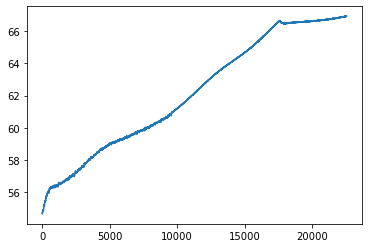

In [136]:
plt.plot(x, y)
plt.show()

In [137]:
model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))
model5 = np.poly1d(np.polyfit(x, y, 5))

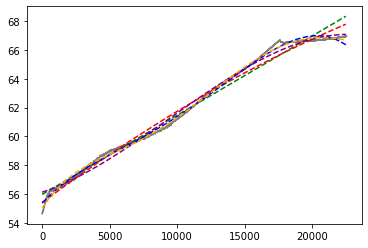

In [141]:
#create scatterplot
polyline = np.linspace(1, x.shape[0], 50)
plt.plot(x, y, color='grey')

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), '--', color='green')
plt.plot(polyline, model2(polyline), '--', color='red')
plt.plot(polyline, model3(polyline), '--', color='purple')
plt.plot(polyline, model4(polyline), '--', color='blue')
plt.plot(polyline, model5(polyline), '--', color='orange')
plt.show()

In [142]:
#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#calculated adjusted R-squared of each model
r_sqr = list()
for i in [1,2,3,4,5]:
    r_sqr.append(adjR(x, y, i))
    
r_sqr

[{'r_squared': 0.9818152210005754},
 {'r_squared': 0.9866760151307875},
 {'r_squared': 0.9923862678756618},
 {'r_squared': 0.9972826824501907},
 {'r_squared': 0.9981454476330579}]

In [163]:
r_sqr_values = [i["r_squared"] for i in r_sqr]
best_model = r_sqr_values.index(max(r_sqr_values))+1
coeffs = globals()[f"model{best_model}"]
print(f"Best Model : {best_model}")

Best Model : 5


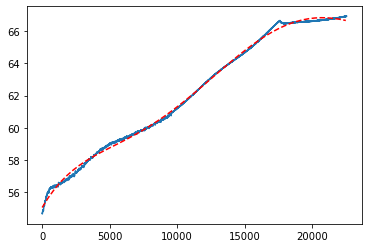

In [164]:
plt.plot(df_selected_filtered.Time_Sec, y)
plt.plot(polyline, coeffs(polyline), '--', color='red')
plt.show()

In [165]:
# + poly[1]x(n-2) + .. + poly[n-1]
def horner(poly, n, x):
 
    # Initialize result
    result = poly[0]
 
    # Evaluate value of polynomial
    # using Horner's method
    for i in range(1, n):
 
        result = result*x + poly[i]
        # print(result)
 
    return result

In [166]:
poly = [i for i in coeffs]
print("Value of polynomial is:", horner(poly, len(poly), 20000))

Value of polynomial is: 66.81599555996881
